# Business Prototyping Toolkit for Python (and Jupyter Notebooks)
The Business Prototyping Toolkit for Python comes with a model simulator, a tool for defining scenarios (Jupyter Notebook - TODO!) and some methods to plot simulation results, a so-called API.

The API for plotting simulation is really simple. It only exposes some methods that generate plots. The simulations run in the background every time you call a plot method. For long and large simulations, pleas bear with me and bring a few seconds of patience before I plot. ;-)
All simulation scenarios have to be in the ``scenarios/`` folder. BPTK_Py will scan and load them - including the models - into python. Each API method comes with many parameters for modifying the graph. The standard settings however are in my config. They define the common "transentis" style.

Usually you only need the ``scenario_name`` (methods for one scenario)/ ``scenario_names`` (methods for a list of scenarios) and ``equation``/``equations`` parameters to get a working example. Of course you will probably want to define a title and labels for the x and y axis. Just look at the example method calls given to get a feel for the optional parameters.

Please run the following lines to import the API to your notebook and ignore the warnings (if any). You run a line by pushing ``Shift + Enter``

In [8]:
from BPTK_Py.bptk import bptk_wrapper 
bptk = bptk_wrapper()

## Example 1: Multiple Equations for one scenario
Here we assume that we would like to simulate multiple equations for one scenario.
The ``bptk.plotOutputsForScenario`` method helps us plotting this simulation. We simulate the equations 'cashFlow.cashFlowYtd' and 'cash.cash' for the scenario "MakeYourStartUpGrow". Play around with the parameters for the x/y labels and title

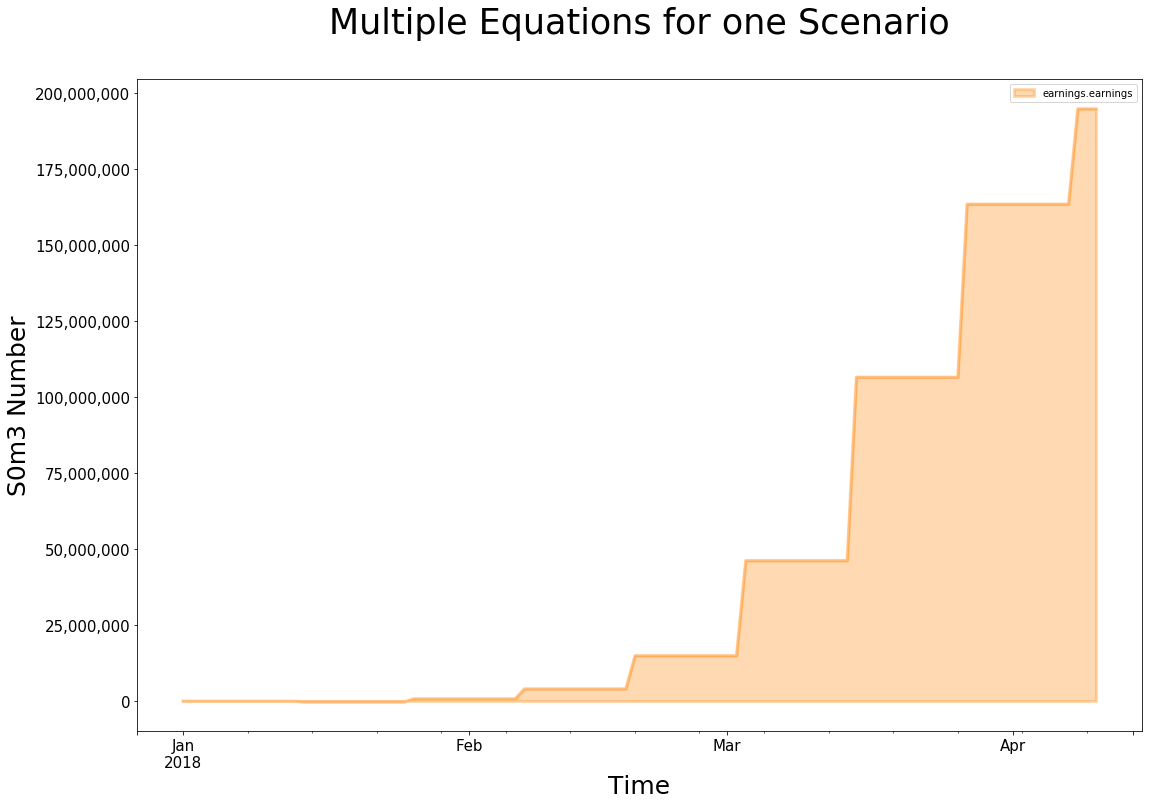

In [19]:
bptk.plotOutputsForScenario(scenario_name="MakeYourStartUpGrow", equations=['cashFlow.cashFlowYtd','cash.cash'],title="Multiple Equations for one Scenario\n",x_label="Time",y_label="S0m3 Number")

### Play with start date and frequency
In the above example, we did not specify the ``freq`` and ``start_date`` parameters. So the series starts at Jan, 1st 2018 and assumes daily values. But what if we want to change this? Let us set ``freq="M"``and ``start_date="1/11/2017"``.
Of course, the graph is the same. But the y-axis changed. Now the plot assumes monthly data, starting at Nov, 1, 2017!

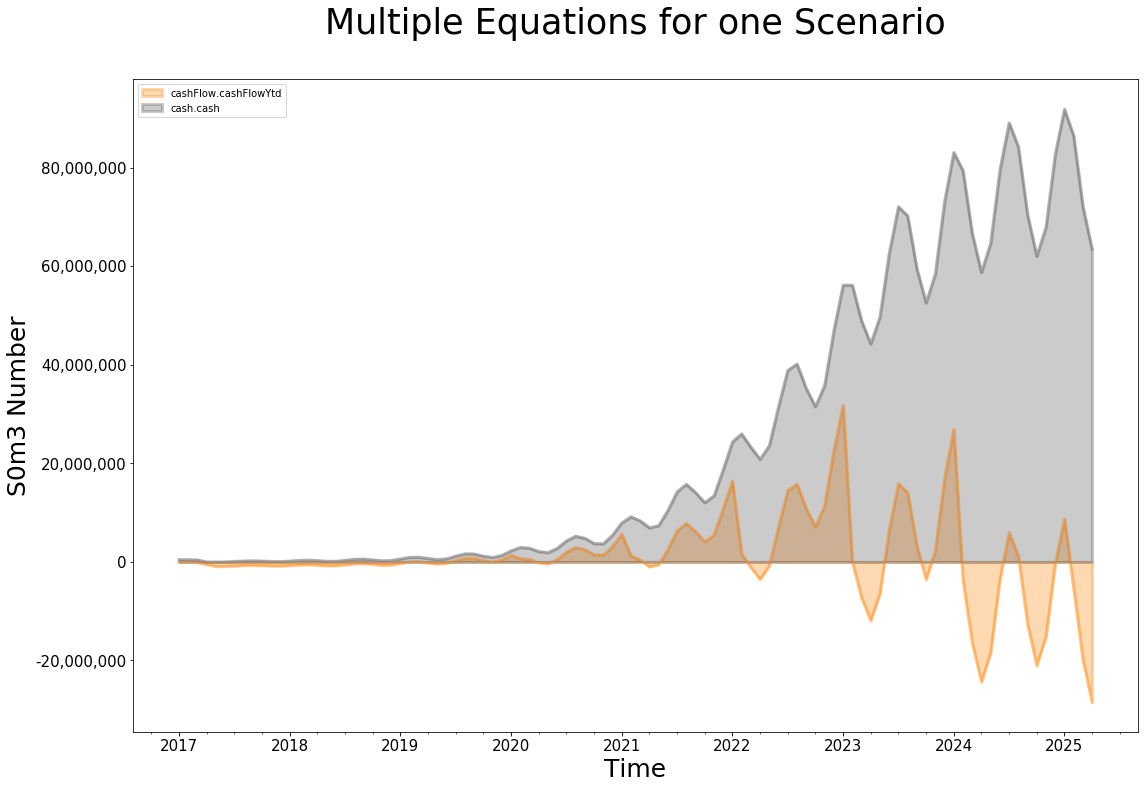

In [12]:
bptk.plotOutputsForScenario(scenario_name="MakeYourStartUpGrow", freq="M", start_date="1/11/2017",equations=['cashFlow.cashFlowYtd','cash.cash'],stacked=False,title="Multiple Equations for one Scenario\n",x_label="Time",y_label="S0m3 Number")

### Naming the series
The equation names are not the kind of names we want to show the customer. So let use the ``series_name`` parameter to rename them. Supply a list of names. The order follows the order of the equations in the ``equations`` parameter!
Use Python's list notation: ``[ ]``. Without this parameter, BPTK will just use the equation and scenario names. If you have 3 equations and only specify one value in the list, will only modify the name of the first series. 

You may also use an empty string in the list to change the name of the second (or third..) series: ``[ "", "nameToChangeTo" ]`` 

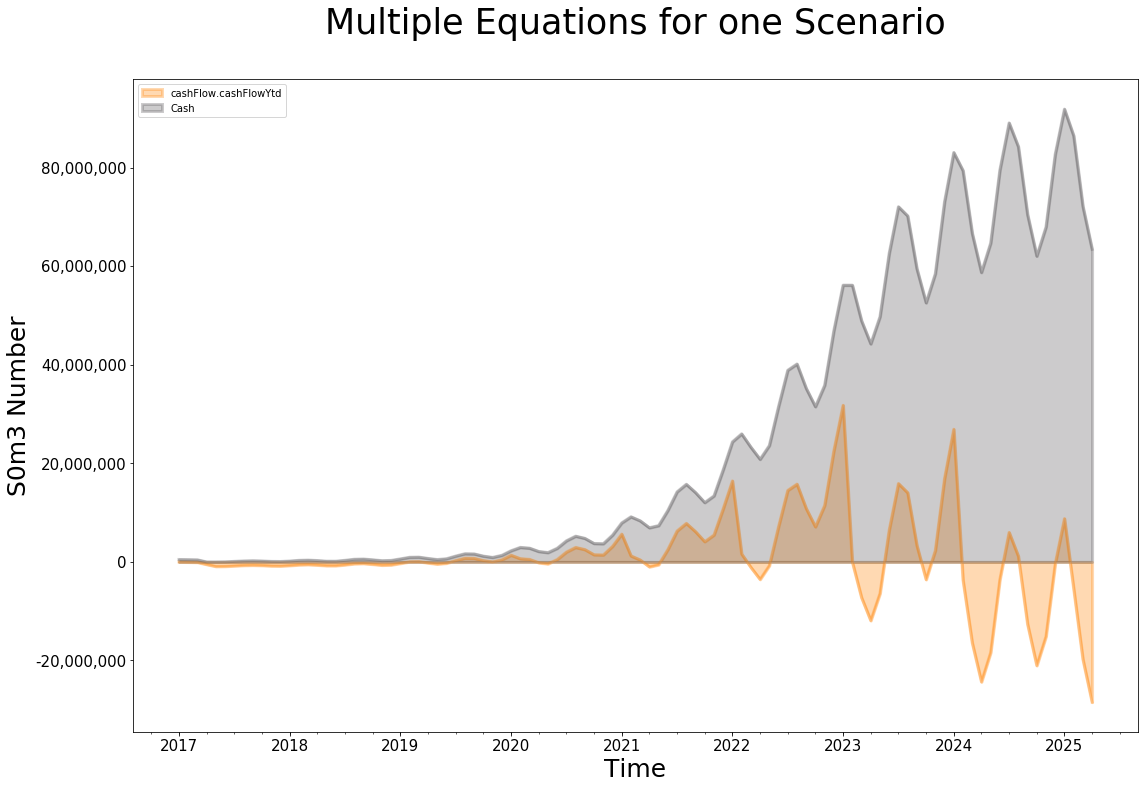

In [14]:
bptk.plotOutputsForScenario(scenario_name="MakeYourStartUpGrow", freq="M", start_date="1/11/2017",equations=['cashFlow.cashFlowYtd','cash.cash'],stacked=False,title="Multiple Equations for one Scenario\n",x_label="Time",y_label="S0m3 Number",series_names=["Cashflow","Cash"])

## Example 2: Plot one equation for multiple scenarios
Now let us change the perspective. In the above example we assumed one scenario for which we simulate multiple equations. Now we simulate **one equation for multiple scenarios**.
The parameters stay the same and you can play around with them just as you could above. The method is: ``bptk.plotScenarioForOutput``.

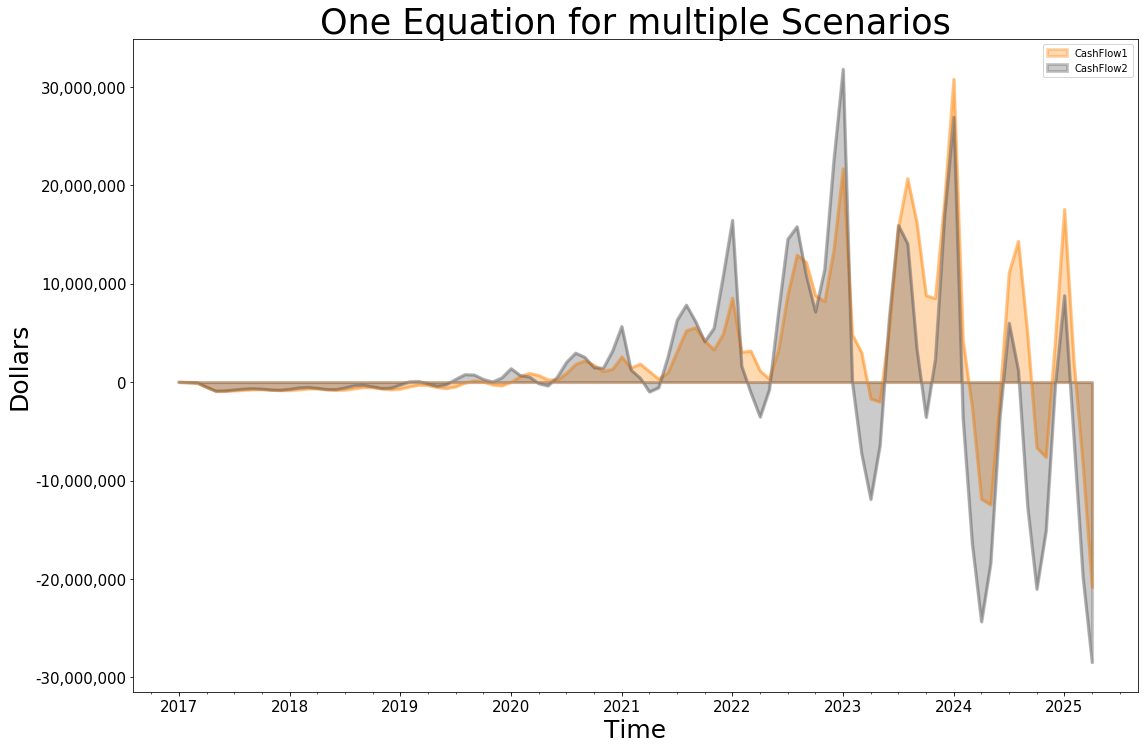

In [15]:
bptk.plotScenarioForOutput(scenario_names=["MakeYourStartUpGrow_2","MakeYourStartUpGrow"],equation="cashFlow.cashFlowYtd",stacked=False, freq="M", start_date="1/11/2017",title="One Equation for multiple Scenarios",x_label="Time",y_label="Dollars",series_names=["CashFlow1","CashFlow2"])

## What if I want another kind of graph?
Well, there is the ``kind`` parameter! Let us see what happens if we set ``kind="line"``!

The documentation 


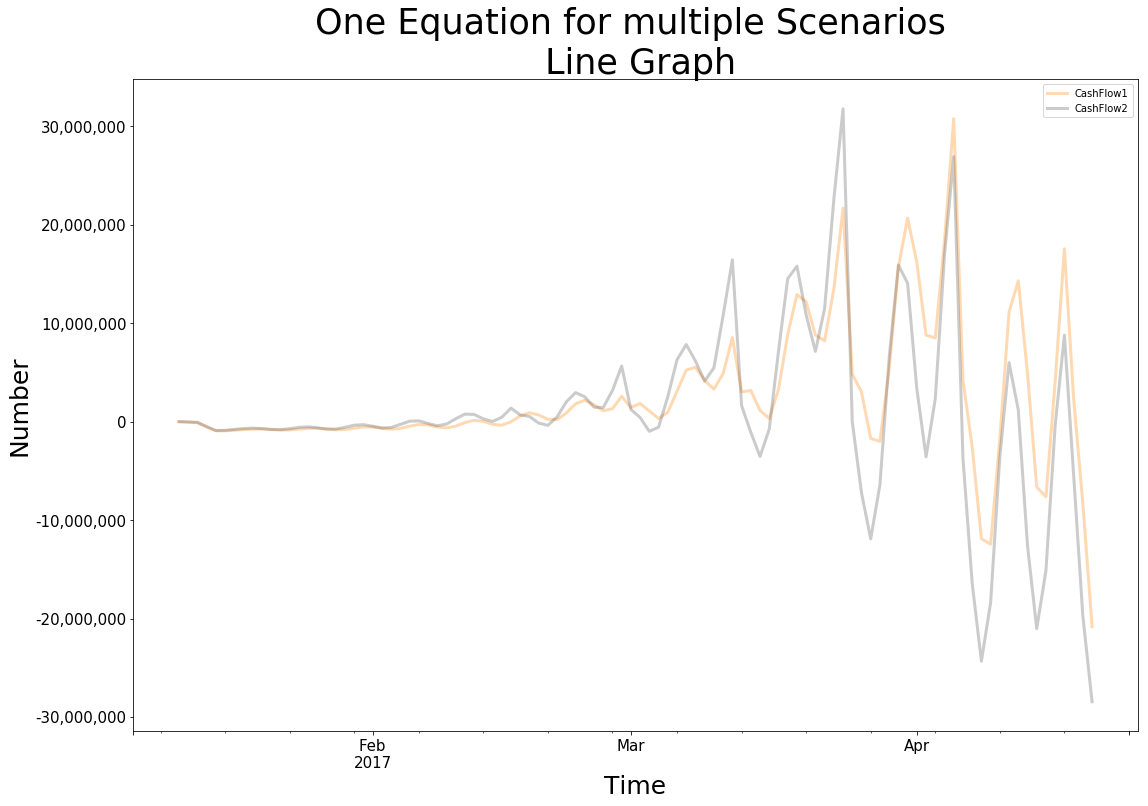

In [16]:
bptk.plotScenarioForOutput(scenario_names=["MakeYourStartUpGrow_2","MakeYourStartUpGrow"],kind="line",equation="cashFlow.cashFlowYtd",stacked=False, freq="D", start_date="1/11/2017",title="One Equation for multiple Scenarios \n Line Graph",x_label="Time",y_label="Number",series_names=["CashFlow1","CashFlow2"])